# Examples and exercises for graphical models

In [29]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

# Only needed to generate graphs, may be safely ommitted 
# once you comment out relevant cells below
import graphviz
from graphviz import Digraph, Graph

# The below are packages I used to solve these exercises, but may be safely removed
from fake_data_for_learning.fake_data_for_learning import (
    BayesianNodeRV, SampleValue, FakeDataBayesianNetwork
)


In [44]:
datadir = Path(os.getcwd()) / 'data'

In [3]:
import networkx as nx

## Graphical models recap

Main assumptions:

1. The graph $G$ is a directed, acyclical graph (DAG)
2. The random variable(s) represented by $G$ follow the *Markov property*
    vsaka spremenljivka je neodvisna od svojih nepovezanih sosedov, če so njeni starši (predhodniki v grafu) poznani.

Recall that a *path* is undirected, and $G$ has no loops, as it is a DAG.

Given a path, recall that a node $Z$ on the path is *blocked* by conditioning on a set of nodes $S$ in $G$ if

1. $Z$ is in $S$ and is a non-collider
2. neither $Z$ nor its descendents is in $S$ and $Z$ is a collider




## Graphical models example: Credit risk

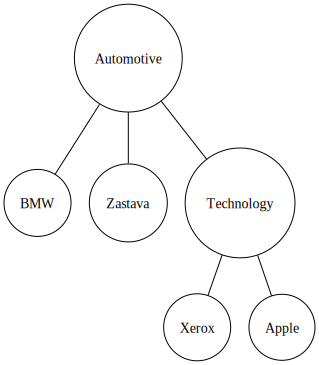

In [8]:
dot = Graph()
dot.attr('node', shape='circle')
dot.node('A', 'Automotive')
dot.node('b', 'BMW')
dot.node('z', 'Zastava')

dot.node('T', 'Technology')
dot.node('x', 'Xerox')
dot.node('a', 'Apple')

dot.edges(['Ab', 'Az', 'AT', 'Tx', 'Ta'])

dot

## Graphical models exercise: DAGs

Consider a directed, acyclical graph (DAG) $G$ with nodes $X_0, \ldots, X_4$ and [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix)

In [9]:
X = np.array([
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]
    ])

1. Draw the graph for $G$. Difficulty: *
2. What row or column properties of the matrix $X$ can be used to identify the nodes with no incoming edges? Difficulty: *
3. Write pseudo- (or better, real) code to implement your method to extract nodes with no incoming edges from $X$. Difficulty: **
4. Write pseudo- (or better, real) code to determine the parents of given node from $X$. Difficulty: **

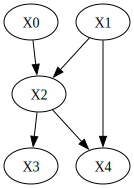

In [10]:
# Creating a graphical display
dot = graphviz.Digraph()

# Adding nodes
for i in range(5):
    dot.node(f'X{i}')

# Adding edges according to the adjacency matrix
for i in range(5):
    for j in range(5):
        if X[i, j] == 1:
            dot.edge(f'X{i}', f'X{j}')

# Graph display
dot

If column $j$ in matrix $X$ constists of all zeros, it means that no node has a connection to node $X_j$

In [11]:
# Identification of nodes without input edges
nodes_without_incoming_edges = [i for i in range(X.shape[1]) if np.all(X[:, i] == 0)]

# Convert results to node names
node_names = [f'X{i}' for i in nodes_without_incoming_edges]
node_names

['X0', 'X1']

In [12]:
def find_parents(X, node):
    # List of parents
    parents = []
    # Check all rows in column 'node'
    for i in range(X.shape[0]):
        if X[i, node] == 1:
            parents.append(i)
    return parents

In [14]:
# Node for which we want to find parents
node = 4

# Finding the parent of node 'node'
parents = find_parents(X, node)

# Convert results to node names
parent_names = [f'X{i}' for i in parents]
parent_names

['X1', 'X2']

## Graphical models exercise: conditional independence

Take K to be your Karma, H to be the hours you spend in the gym lifting weight each day, and then W be the weight you can bench press on a given day. For simplicity, all random variables are binary, with each row representing a day in your life.

In [16]:
df = pd.read_csv(datadir / 'karma_weights.csv').head()
df.head()

,karma,hours,weight
0,1,0,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,0,1


You are also the parent of a very young child, so perhaps Karma will punish you for devoting too much time to your triceps and neglecting your partner and baby. Let $G$ be a graphical model for $(K, H, W)$, as shown below.

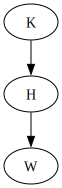

In [17]:
dot = Digraph(comment='d-sep-exercise-1')
dot.attr('node')
dot.node('K')
dot.node('H')
dot.node('W')

dot.edges(['KH', 'HW'])
dot

Difficulty: *

Determine all conditionally independent relationships $K \perp W | S$ for possible values of $S$, and justify your answer.

To determine all conditionally independent relationships $K \perp W | S$ for possible values of $S$, we can analyze the graphical model.

From the graphical model, we can see that $K$ and $W$ are not directly connected, but they are connected through $H$. This means that $H$ is a mediator between $K$ and $W$.

Using the concept of d-separation, we can conclude that:

$K \perp W | H$, because $H$ blocks the path between $K$ and $W$.
$K \not\perp W | \emptyset$, because there is a path between $K$ and $W$ through $H$.
$K \not\perp W | K$, because conditioning on $K$ does not change the relationship between $K$ and $W$.
$K \not\perp W | W$, because conditioning on $W$ does not change the relationship between $K$ and $W$.
$K \not\perp W | {K, W}$, because conditioning on both $K$ and $W$ does not change the relationship between $K$ and $W$.
Therefore, the only conditionally independent relationship is $K \perp W | H$, which means that $K$ and $W$ are independent given $H$.

Definition: An undirected path p in a DAG G is blocked by a set of nodes S if and only if p contains a chain of nodes X -> Y -> Z, such that $Y \in S$.

Definition: If a set of nodes S blocks every path between two nodes X and Y, then X and Y are called d-separated conditional on S.
D-separation theorem implies conditional independence.

Solution: $S = \{H\}$: After above definition, K and W are d-separated conditional on S., since S blocks path.

In [18]:
G = nx.DiGraph()
G.add_edges_from(
    [
        ("K", "H"),
        ("H", "W")
    ]
)
x, y, z = ({"K"}, {"W"}, {"H"})
nx.is_d_separator(G, x, y, z)

True

In [19]:
nx.find_minimal_d_separator(G, x, y)

{'H'}

## Graphical models exercise: conditional independence 2

Difficulty: *

Same as above, but for $K \perp H | S$.

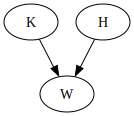

In [7]:
dot = Digraph()
dot.attr('node')
dot.node('K')
dot.node('H')
dot.node('W')

dot.edges(['HW', 'KW'])

dot

Definition: An undirected path p in a DAG G is blocked by a set of nodes S if and only if p contains a collider X -> Y <- Z, such that $Y \notin S$.

Definition: If a set of nodes S blocks every path between two nodes X and Y, then X and Y are called d-separated conditional on S.
D-separation theorem implies conditional independence.

Solution: $S = \{\}$: After above definition, K and H are d-separated conditional on S

In [20]:
G = nx.DiGraph()
G.add_edges_from(
    [
        ("K", "W"),
        ("H", "W")
    ]
)
x, y, z = ({"K"}, {"H"}, {""})
nx.find_minimal_d_separator(G, x, y)

set()

## Graphical models exercise: conditional independence 3

Difficulty: **

Determine all conditional independence relationships implied by the graphical model:

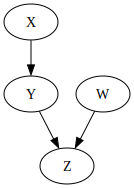

In [8]:
dot = Digraph(comment='d-sep-exercise-1')
dot.attr('node')
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.node('W')

dot.edges(['XY', 'YZ', 'WZ'])

dot

In [31]:
G = nx.DiGraph()
G.add_edges_from(
    [
        ("X", "Y"),
        ("Y", "Z"),
        ("W", "Z")
    ]
)
x, y, z = ({"X"}, {"Z"}, {"Y"})
nx.is_d_separator(G, x, y, z)

True

In [22]:
x, y, z = ({"X"}, {"Z"}, {"Y", "W"})
nx.is_d_separator(G, x, y, z)

True

In [24]:
x, y, z = ({"Y"}, {"W"}, {"Z"})
nx.find_minimal_d_separator(G, x, y)

set()

In [27]:
x, y, z = ({"Y"}, {"W"}, {"X"})
nx.is_d_separator(G, x, y, z)

True

I am performing D-separation. Two nodes A and B are d-separated given the set S if all paths between A and B are blocked given S.

- Conditional independence $X \perp Z$: $X \perp Z \mid Y$ and $X \perp Z \mid \{Y, W\}$
- Conditional independence $X \perp W$ always holds.
- Conditional independence $Y \perp W$: $Y \perp W \mid \{\}$ and $Y \perp W \mid X$


## Graphical models exercise: d-separation for hit-rate

Difficulty: **

Find all conditional independence relations implied by the graph structure of the below graphical model.

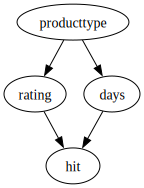

In [30]:
dot = Digraph()
dot.attr('node')
dot.node('p', 'producttype')
dot.node('r', 'rating')
dot.node('d', 'days')
dot.node('h', 'hit')

dot.edges(['pd', 'pr', 'rh', 'dh'])

dot

In [34]:
G = nx.DiGraph()
G.add_edges_from(
    [
        ("P", "R"),
        ("P", "D"),
        ("R", "H"),
        ("D", "H")
    ]
)
x, y, z = ({"R"}, {"D"}, {"P"})
nx.is_d_separator(G, x, y, z)

False

From seminar: All paths from product_type to hit are blocked by $\{days, rating\}$, hence $(product\_type \perp hit | days, rating)$


Definition: An undirected path p in a DAG G is blocked by a set of nodes S if and only if p contains a fork X <- Y -> Z, such that $Y \in S$.

Definition: If a set of nodes S blocks every path between two nodes X and Y, then X and Y are called d-separated conditional on S.
D-separation theorem implies conditional independence.

Solution: $S = \{product\_type\}$: After above definition, rating and days are d-separated conditional on S

- $product\_type \perp hit \mid \{days, rating\}$
- $rating \perp days \mid \{product\_type\}$

## Graphical models exercise: model selection

Consider the following Bayesian network

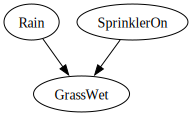

In [43]:
dot = Digraph()
dot.attr('node')
dot.node('X', 'Rain')
dot.node('Y', 'SprinklerOn')
dot.node('Z', 'GrassWet')

dot.edges(['XZ', 'YZ'])

dot

where 
$$
\begin{equation*}
\mathrm{Rain} \sim B(p_R) \\
\mathrm{SprinklerOn} \sim B(p_S)
\end{equation*}
$$

and $\mathrm{GrassWet}$ is Bernoulli conditioned on the values of $\mathrm{Rain}$ and $\mathrm{SprinklerOn}$.

1. Write down the probability distribution equation / decomposition for $(\mathrm{Rain}, \mathrm{SprinklerOn}, \mathrm{GrassWet})$. Difficulty: *
2. Given the data in `data/wet_grass.csv`, estimate the probability distribution of $(\mathrm{Rain}, \mathrm{SprinklerOn}, \mathrm{GrassWet})$. Difficulty: **

$
P(\mathrm{Rain}, \mathrm{SprinklerOn}, \mathrm{GrassWet}) = P(\mathrm{GrassWet} \mid \mathrm{Rain}, \mathrm{SprinklerOn}) \cdot P(\mathrm{Rain}) \cdot P(\mathrm{SprinklerOn})
$

To estimate the probability distribution from the given data, we need to calculate the empirical probabilities from the observed counts. 
We will count the occurrences of each combination of $(\mathrm{Rain}, \mathrm{SprinklerOn}, \mathrm{GrassWet})$

In [45]:
data = pd.read_csv(datadir / 'wet_grass.csv')
data.head()

,Rain,SprinklerOn,GrassWet
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,1,1,1


In [50]:
# Count the occurrences
counts = data.value_counts().reset_index(name='count')
counts.columns = ['Rain', 'SprinklerOn', 'GrassWet', 'count']

# Calculate the probabilities
counts['probability'] = counts['count'] / len(data)

counts

,Rain,SprinklerOn,GrassWet,count,probability
0,0,0,0,538,0.538
1,1,0,1,227,0.227
2,0,0,1,64,0.064
3,1,0,0,52,0.052
4,0,1,1,48,0.048
5,0,1,0,35,0.035
6,1,1,1,33,0.033
7,1,1,0,3,0.003


od tu dalje sem poskušala narediti rešitev za zadnjo nalogo. Mislim, da je potrebn +o izračunati desno stran porazdelitve za vsak model posebej in videti kateri je bolj natančen. Ugotoviti je potrebno, kako se iz tabele izračuna pogojne porazdelitve. 

In [51]:
# Izračunajte marginalne verjetnosti Rain
P_rain_0 = counts[counts['Rain'] == 0]['count'].sum() / len(data)
P_rain_1 = counts[counts['Rain'] == 1]['count'].sum() / len(data)

# Izračunajte marginalne verjetnosti SprinklerOn
P_sprinkler_0 = counts[counts['SprinklerOn'] == 0]['count'].sum() / len(data)
P_sprinkler_1 = counts[counts['SprinklerOn'] == 1]['count'].sum() / len(data)

In [76]:
# P(GW | R, S)
P_GW_given_rs = []
for d in range(2):
    df_mask_d = data['GrassWet'] == d
    n_records_d = sum(df_mask_d)
    P_GW_given_rs_result  = data.loc[df_mask_d].groupby(['Rain', 'SprinklerOn', 'GrassWet']).size() / n_records_d
    P_GW_given_rs.append(P_GW_given_rs_result)

# Non-do calculation, 2nd term in product
P_GW_given_rs = pd.concat(P_GW_given_rs, axis=0)
P_GW_given_rs.name = 'GW'

In [75]:
P_GW_given_rs

Rain  SprinklerOn  GrassWet
0     0            0           0.856688
      1            0           0.055732
1     0            0           0.082803
      1            0           0.004777
0     0            1           0.172043
      1            1           0.129032
1     0            1           0.610215
      1            1           0.088710
Name: hit, dtype: float64

## Graphical models exercise: model selection, continued

Consider the same data as above, `data/wet_grass.csv`, but with the graphical model

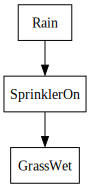

In [12]:
dot = Digraph()
dot.attr('node', shape='box')
dot.node('X', 'Rain')
dot.node('Y', 'SprinklerOn')
dot.node('Z', 'GrassWet')

dot.edges(['XY', 'YZ'])

dot

Evaluate which of the two graphical models is better for the given data.

Difficulty: **

https://jonathan-hui.medium.com/machine-learning-graphical-model-b68b0c27a749

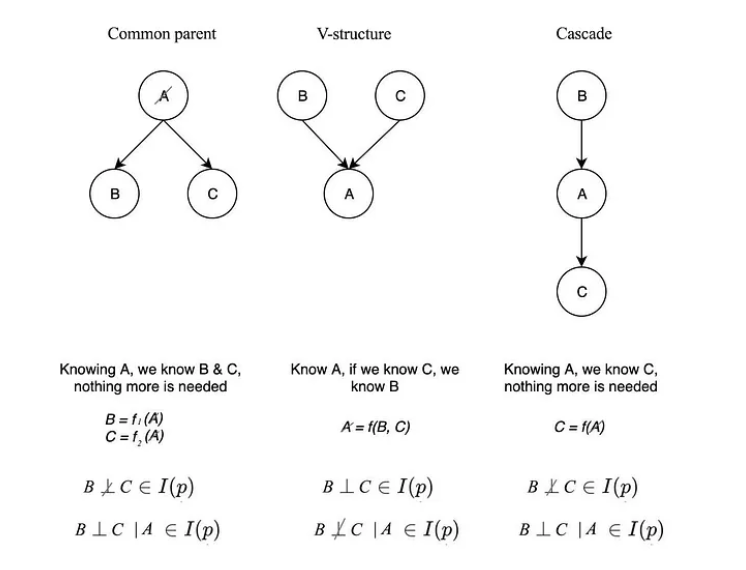